In [1]:
#Importing required modules
import pandas as pd
import numpy as np 
import nltk

In [2]:
#creating a pandas dataframe with the CSV file provided
df = pd.read_csv(r"C:\Users\elizabeth\Documents\Luca's scraping\cyber_tweets.csv")

In [3]:
df.head()

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,user_description,user_friends_n,user_followers_n,retweet_text,quote_text,quote_screen_name
0,0,1292082364328312834,jenny strasburg,jennystrasburg,10,RT @pwonacott: Behind the Beirut Explosion: Se...,2020-08-09 14:02:19.120328,2020-08-08 12:56:56.000000,0,[],8427,NaN,Twitter for iPhone,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5552,Behind the Beirut Explosion: Seven Years of Of...,None,None
1,1,1291840899081801734,jenny strasburg,jennystrasburg,4975,RT @WSJ: The Bill &amp; Melinda Gates Foundati...,2020-08-09 14:02:19.120359,2020-08-07 20:57:26.000000,0,[],8427,NaN,Twitter for iPhone,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5552,The Bill &amp; Melinda Gates Foundation said i...,None,None
2,2,1291813767072944131,jenny strasburg,jennystrasburg,0,"In a public report, senior counterintelligence...",2020-08-09 14:02:19.120367,2020-08-07 19:09:37.000000,0,[],8427,NaN,Twitter for iPhone,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5552,None,None,None
3,3,1291658446304153600,jenny strasburg,jennystrasburg,1,"RT @margheritamvs: A heartbreaking tale, beaut...",2020-08-09 14:02:19.120374,2020-08-07 08:52:26.000000,0,[],8427,NaN,Twitter for iPhone,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5552,"A heartbreaking tale, beautifully told by @Abi...",None,None
4,4,1291553272684261377,jenny strasburg,jennystrasburg,472,RT @Kate_OKeeffe: The Trump administration jus...,2020-08-09 14:02:19.120381,2020-08-07 01:54:30.000000,0,[],8427,NaN,Twitter for iPhone,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5552,The Trump administration just recommended a pl...,None,None


In [4]:
print(len(df))

27879


In [5]:
#preprocessing - first glanses at the data 
column_names = list(df.columns)
unique_values = list()
for col in df:
    unique_values.append(df[col].unique())
number_unique_values = list()
for col in df:
    number_unique_values.append(len(df[col].unique()))

In [6]:
#a summary table fo unique information 
summary_table = pd.DataFrame(column_names)
summary_table.columns=['column names']
summary_table['unique values'] = unique_values
summary_table['number of unique values'] = number_unique_values
summary_table

,column names,unique values,number of unique values
0,Unnamed: 0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3245
1,tweet_id,"[1292082364328312834, 1291840899081801734, 129...",27879
2,name,"[jenny strasburg, Dan Simmons, Leo Kelion, Gor...",12
3,screen_name,"[jennystrasburg, dannsimmons, LeoKelion, gordo...",12
4,retweet_count,"[10, 4975, 0, 1, 472, 3, 5, 4, 33, 2, 6, 816, ...",1139
5,text,[RT @pwonacott: Behind the Beirut Explosion: S...,27850
6,mined_at,"[2020-08-09 14:02:19.120328, 2020-08-09 14:02:...",27879
7,created_at,"[2020-08-08 12:56:56.000000, 2020-08-07 20:57:...",27759
8,favourite_count,"[0, 1, 2, 5, 14, 4, 9, 11, 18, 6, 3, 40, 8, 50...",223
9,hashtags,"[[], [{'text': 'COVID', 'indices': [39, 45]}],...",3291


In [7]:
import re

In [8]:
print(df['created_at'][0])

2020-08-08 12:56:56.000000


In [9]:
#I want to split the date so we can .groupby() 

df1 = df['created_at'].str.split(expand=True)
df1.columns = ['date', 'time']
df_date = df1['date'].str.split('-', expand=True)
df_date.columns = ['year', 'month', 'date']
df_time = df1['time'].str.split(':', expand=True)
df_time.columns = ['hour', 'minute', 'second']
df_date_time = pd.concat((df_date, df_time), axis=1)
df_date_time.head()
df = pd.concat((df, df_date_time), axis=1)
#drop date and change date1 to date

In [10]:
print(df['text'][0:3])

0    RT @pwonacott: Behind the Beirut Explosion: Se...
1    RT @WSJ: The Bill &amp; Melinda Gates Foundati...
2    In a public report, senior counterintelligence...
Name: text, dtype: object


In [11]:
print(df['hashtags'][53:56])

53         [{'text': 'COVID', 'indices': [39, 45]}]
54                                               []
55    [{'text': 'TheJournal', 'indices': [27, 38]}]
Name: hashtags, dtype: object


In [12]:
def find_callouts(text):
    list_callouts = []
    for i in range(0,text.shape[0]):
        callout_temp = re.findall(r'\@\w+',df['text'][i])
        list_callouts.append(callout_temp)
    return list_callouts
callouts = find_callouts(df['text'])
df['callouts'] = callouts

In [13]:
def find_hashtags(text):
    list_hashtags = []
    for i in range(0,text.shape[0]):
        hashtag_temp = re.findall(r'\#(\w+)',df['text'][i])
        list_hashtags.append(hashtag_temp)
    return list_hashtags
df['hashtag1'] = find_hashtags(df['text'])

In [14]:
# make a new column to highlight retweets
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

6544

In [15]:
df['hashtag1'][53:56]

53         [COVID]
54              []
55    [TheJournal]
Name: hashtag1, dtype: object

In [16]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
df['clean_tweet'] = df['text'].apply(lambda x: clean_text(x))

In [17]:
df['clean_tweet'][0]

'RT : Behind the Beirut Explosion: Seven Years of Official Neglect - WSJ. Deep gumshoe reporting from \u2066\u2069, \u2066…'

In [18]:
pip install gensim==3.8.3

Note: you may need to restart the kernel to use updated packages.


# LDA

In [19]:
import gensim

In [20]:
# import packages for stopword removal 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elizabeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elizabeth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
#adding 'RT' (retweet) to list of words to remove  
stop_words = stopwords.words('english')
stop_words.extend(['rt', 'u', 'r', 'ur'])

In [23]:
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
#this is slow -compared to the tokenization in sklearn
def normalized_df_text(text): #normalizing, stop word removal, & lementizing
    normalized =[]
    for i in range(0,text.shape[0]):
        norm_temp = re.findall(r'[A-Za-z]+',text[i]) #taking all words (leaving punctuation out)
        norm_temp = [w.lower() for w in norm_temp] # putting words in lower case
        norm_temp = [w for w in norm_temp if not w in stop_words] # removing stopwords
        lemma = WordNetLemmatizer()
        norm_temp = [lemma.lemmatize(w, pos = "v") for w in norm_temp] #lemmatizing verbs
        norm_temp = [lemma.lemmatize(w, pos = "n") for w in norm_temp] #lemmatizing nouns
        norm_temp = [' '.join(norm_temp)] 
        normalized.append(norm_temp)
    return normalized

normalized = normalized_df_text(df['clean_tweet'])
df['normalized_tweet'] = normalized

In [25]:
#tokenising for df
def tokenizing_df_text(text):
    normalized_tweets = []
    for i in range(len(text)):
        normalized_tweets.append(nltk.word_tokenize(text[i][0]))
    return normalized_tweets
    
df['tokenized_tweet'] = tokenizing_df_text(df['normalized_tweet'])

# merging everytweet into one corpus for ngrams

In [26]:
#turning clean_tweets into a corpus
clean_tweet_corpus = df['clean_tweet'].str.cat(sep=' ')

In [27]:
#this is slow -compared to the tokenization in sklearn
def normalized_corpus_text(text): #normalizing, stop word removal, & lementizing
    norm_temp = re.findall(r'[A-Za-z]+',text) #taking all words (leaving punctuation out)
    norm_temp = [w.lower() for w in norm_temp] # putting words in lower case
    norm_temp = [w for w in norm_temp if not w in stop_words] # removing stopwords
    lemma = WordNetLemmatizer()
    norm_temp = [lemma.lemmatize(w, pos = "v") for w in norm_temp] #lemmatizing verbs
    norm_temp = [lemma.lemmatize(w, pos = "n") for w in norm_temp] #lemmatizing nouns
    norm_temp = [' '.join(norm_temp)] 
    return norm_temp

In [28]:
normalized_corpus = normalized_corpus_text(clean_tweet_corpus)

In [29]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df['tokenized_tweet'], min_count=1, threshold=2) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df['tokenized_tweet']], threshold=1)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [30]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

df['bigrams'] = make_bigrams(df['tokenized_tweet'])
df['ngram'] = make_trigrams(df['bigrams'])
print(df['ngram'][0:10])

0    [behind, beirut_explosion, seven_year, officia...
1    [bill, amp, melinda, gate_foundation, say, bac...
2    [public_report, senior, counterintelligence_of...
3              [heartbreaking, tale, beautifully_tell]
4    [trump_administration, recommend, plan, would_...
5    [video, wsj, give_u, tour, demolish, home, nei...
6    [capital_one, fin, million_hack, order, beef, ...
7    [nra, file, deep, wide, eg, nra, pay, private_...
8    [new_york, ag, cap, month_investigation, state...
9    [new_york, state_seek, dissolve, nra, allege_f...
Name: ngram, dtype: object


In [31]:
def tokenized_corpus_text(text):
    tokenized_corpus = nltk.word_tokenize(str(text))
    return tokenized_corpus

tokenized_corpus = tokenized_corpus_text(normalized_corpus)

# Wordclouds

In [32]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [33]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [34]:
def wordcloud_plot(text):
    wordcloud = WordCloud(collocations=False, 
                          width = 1000, 
                          height = 700, 
                          background_color ='white', 
                          min_font_size = 10).generate(text)
    
    plt.figure(figsize = (8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

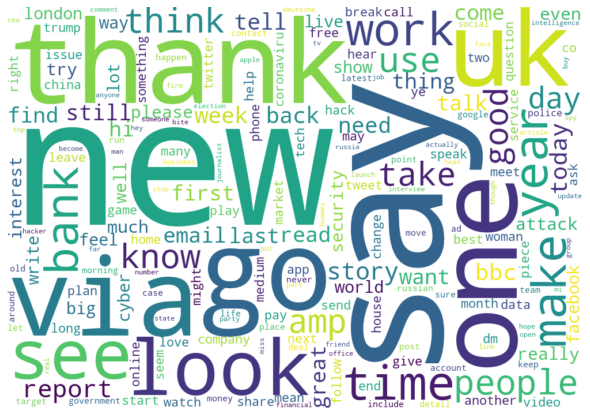

In [35]:
#tweet corpus wordcloud
text = str(normalized_corpus)
wordcloud_plot(text)

# Hashtags

In [36]:
#creating a dataframe with only the tweets with hashtags
df_hashtag = df[df['hashtag1'].apply(lambda x: len(x)) > 0]

In [37]:
#I want to lowercase the hash tags in df_hashtag
norm = []
for i in range(len(df_hashtag['hashtag1'])):
    norm_temp = re.findall(r'[A-Za-z]+',df['hashtag1'][i]) #taking all words (leaving punctuation out)
    norm_temp = [w.lower() for w in norm_temp] # putting words in lower case
    norm.append(norm_temp)
norm


TypeError: expected string or bytes-like object

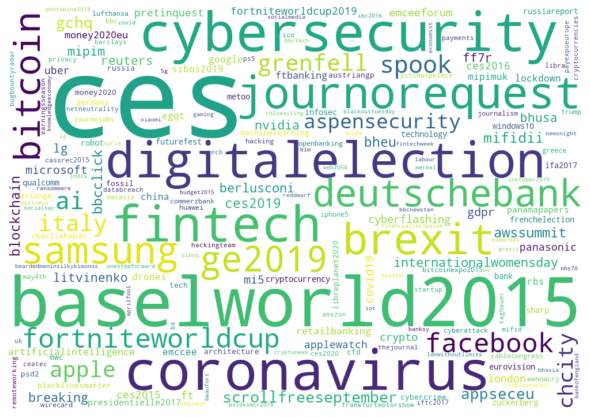

In [38]:
#hashtag wordcloud
hashtag_corpus = df_hashtag.hashtag1.sum()
hashtag_corpus = ' '.join(hashtag_corpus).lower()
wordcloud_plot(hashtag_corpus)

The idea of correlating the hastags came from https://github.com/enoreese

In [ ]:
hashtags_list_df = tweets.loc[
                       tweets.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [72]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in df_hashtag.hashtag1
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df.head()
len(flattened_hashtags_df)

4769

In [40]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

2513

In [74]:
# count of appearances of each hashtag
num_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
num_hashtags.head(10)

,hashtag,counts
0,CES,197
1,Baselworld2015,100
2,coronavirus,54
3,cybersecurity,45
4,digitalelection,43
5,journorequest,41
6,Brexit,40
7,Samsung,39
8,fintech,36
9,DeutscheBank,35


In [75]:
len(num_hashtags)

2513

In [109]:
'''Find Correlated Hashtags
We will need to turn the text into numeric form. 
It is possible to do this by transforming from a list of hashtags 
to a vector representing which hashtags appeared in which rows.'''

# take hashtags which appear at least this amount of times
min_appearance = 15

# find popular hashtags - make into python set for efficiency
popular_hashtags = set(num_hashtags[
                           num_hashtags.counts>=min_appearance
                           ]['hashtag'])
len(popular_hashtags)


26

In [110]:
popular_hashtags

{'AI',
 'AWSSummit',
 'AppSecEU',
 'Apple',
 'AspenSecurity',
 'BHEU',
 'Baselworld2015',
 'Brexit',
 'CES',
 'CES2019',
 'CHCity',
 'DeutscheBank',
 'Facebook',
 'FortniteWorldCup',
 'GCHQ',
 'GE2019',
 'Grenfell',
 'Italy',
 'Samsung',
 'bitcoin',
 'coronavirus',
 'cybersecurity',
 'digitalelection',
 'fintech',
 'journorequest',
 'spook'}

In [111]:
'''Next we are going to create a new column in df_hashtag which filters 
the hashtags to only the popular hashtags. 
We will also drop the rows where no popular hashtags appear.'''

# make a new column with only the popular hashtags
df_hashtag['popular_hashtags'] =df_hashtag.hashtag1.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags])

# drop rows without popular hashtag
popular_hashtags_list_df = df_hashtag.loc[
            df_hashtag.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

len(popular_hashtags_list_df)

<ipython-input-111-b8c834c3fa36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hashtag['popular_hashtags'] =df_hashtag.hashtag1.apply(


915

In [112]:
'''Next we want to vectorise our the hashtags
To do this, we create a dataframe where the hashtags contained in each row are in vector form.'''

# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [113]:
# Drop popular_hashtags columns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

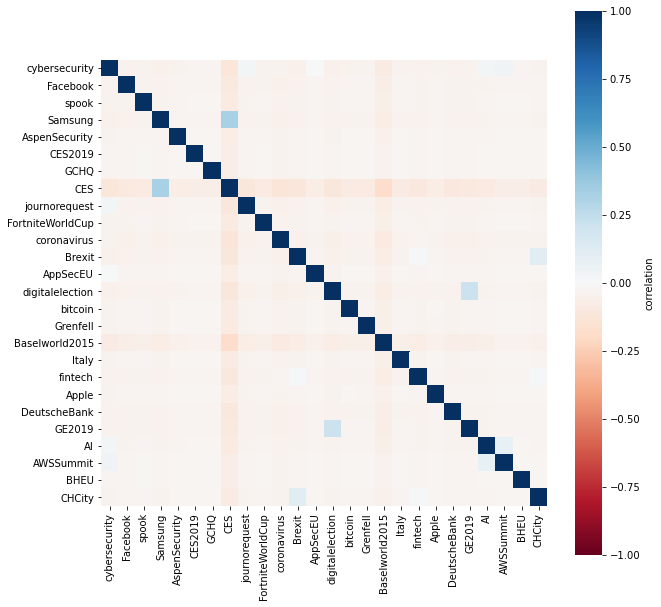

In [114]:
import seaborn as sns

# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()



# combining hashtag infor with tweet 

In [121]:
df['tweet&hashtag'] = df['ngram']+ df['hashtag1']
df['tweet&hashtag'][53]

['approximately',
 'one_fifth',
 'patient',
 'admit',
 'german',
 'hospital',
 'february',
 'mid',
 'april',
 'die',
 'patient',
 'COVID']

In [119]:
print(type(df['ngram'][0]))
print(type(df['hashtag1'][0]))


<class 'list'>
<class 'list'>


# LDA

In [125]:
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

#and this is from: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
id_map = Dictionary(df['tweet&hashtag'])

count = 0
for k, v in id_map.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
        
# creating a dictionary reporting how many words and how many times those words appear
bow_corpus = [id_map.doc2bow(doc) for doc in df['tweet&hashtag']]

# Preview Bag Of Words for our sample preprocessed document.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               id_map[bow_doc_0[i][0]], 
                                                     bow_doc_0[i][1]))


0 behind
1 beirut_explosion
2 deep
3 gumshoe
4 neglect
5 official
6 report
7 seven_year
8 wsj
9 amp
10 back
Word 0 ("behind") appears 1 time.
Word 1 ("beirut_explosion") appears 1 time.
Word 2 ("deep") appears 1 time.
Word 3 ("gumshoe") appears 1 time.
Word 4 ("neglect") appears 1 time.
Word 5 ("official") appears 1 time.
Word 6 ("report") appears 1 time.
Word 7 ("seven_year") appears 1 time.
Word 8 ("wsj") appears 1 time.


In [126]:

num_topics = 5
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics=num_topics, 
                                       id2word=id_map, 
                                       passes=2, 
                                       workers=17,
                                       random_state = 0)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.004*"go" + 0.004*"one" + 0.003*"get" + 0.003*"make" + 0.003*"amp" + 0.003*"thank" + 0.003*"via" + 0.003*"people" + 0.003*"day" + 0.003*"uk"
Topic: 1 
Words: 0.008*"say" + 0.004*"amp" + 0.003*"use" + 0.003*"via" + 0.003*"get" + 0.003*"uk" + 0.003*"new" + 0.003*"make" + 0.002*"like" + 0.002*"work"
Topic: 2 
Words: 0.009*"thank" + 0.006*"via" + 0.005*"new" + 0.004*"look" + 0.004*"see" + 0.004*"think" + 0.003*"get" + 0.003*"time" + 0.003*"go" + 0.003*"one"
Topic: 3 
Words: 0.005*"one" + 0.004*"say" + 0.004*"think" + 0.004*"report" + 0.003*"via" + 0.003*"know" + 0.003*"take" + 0.003*"also" + 0.003*"uk" + 0.003*"see"
Topic: 4 
Words: 0.006*"say" + 0.005*"get" + 0.005*"go" + 0.004*"via" + 0.003*"work" + 0.003*"like" + 0.003*"today" + 0.003*"one" + 0.003*"good" + 0.003*"find"


# LDA using TfidfModel

In [127]:
# Create tf-idf model object using models.TfidfModel on 'corpus’ and save it to ‘tfidf’, 
# TfidfModel is short for term frequency-inverse document frequency: a numeric stat reflecting how important a word is
# increases proportionally to the number of times a word appears in a doc.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

# then apply transformation to the entire corpus and call it ‘corpus_tfidf’
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2536275396670406),
 (1, 0.4194719704090209),
 (2, 0.2989891036222708),
 (3, 0.449941592382585),
 (4, 0.4194719704090209),
 (5, 0.2578677759813975),
 (6, 0.17773541529742803),
 (7, 0.36440254916186526),
 (8, 0.247068405483094)]


In [208]:
#Running LDA using TF-IDF

num_topics = 40

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=num_topics, 
                                             id2word=id_map, 
                                             passes=2, 
                                             workers=17, 
                                             random_state= 0)
# For each topic, explore the words occuring in that topic and its relative weight.
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \n Word: {}'.format(idx, topic))

Topic: 0 
 Word: 0.003*"fall" + 0.002*"definitely" + 0.002*"else" + 0.002*"blockchain" + 0.002*"exclusive" + 0.002*"london" + 0.002*"vulnerability" + 0.001*"p" + 0.001*"potential" + 0.001*"trump"
Topic: 1 
 Word: 0.002*"data_breach" + 0.002*"excite" + 0.002*"window" + 0.002*"wed" + 0.002*"round" + 0.002*"oil" + 0.002*"word" + 0.001*"ransomware_attack" + 0.001*"one" + 0.001*"question"
Topic: 2 
 Word: 0.008*"yes" + 0.003*"one" + 0.002*"hot" + 0.002*"stream" + 0.002*"attack" + 0.001*"exit" + 0.001*"fraud" + 0.001*"time" + 0.001*"yet" + 0.001*"report"
Topic: 3 
 Word: 0.003*"hair" + 0.002*"kick" + 0.002*"last_year" + 0.002*"track" + 0.001*"school" + 0.001*"book" + 0.001*"db" + 0.001*"festival" + 0.001*"cheeky" + 0.001*"specialist"
Topic: 4 
 Word: 0.003*"leo_kelion_co_uk" + 0.002*"announcement" + 0.001*"allegation" + 0.001*"grind" + 0.001*"linkedin" + 0.001*"impressive" + 0.001*"slightly" + 0.001*"snap" + 0.001*"unless" + 0.001*"project"
Topic: 5 
 Word: 0.020*"thank" + 0.003*"sorry" + 0.

# Evaluation of LDA


In [54]:
print(bow_corpus[0])
print(corpus_tfidf[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
[(0, 0.2536275396670406), (1, 0.4194719704090209), (2, 0.2989891036222708), (3, 0.449941592382585), (4, 0.4194719704090209), (5, 0.2578677759813975), (6, 0.17773541529742803), (7, 0.36440254916186526), (8, 0.247068405483094)]


In [129]:
# Evaluating the bag of words LDA model 
#Where woudl the text tweet [0] be classified?
# Notice this tweet has nothing to do with these words!
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))



Score: 0.9183495044708252	 
Topic: 0.004*"go" + 0.004*"one" + 0.003*"get" + 0.003*"make" + 0.003*"amp" + 0.003*"thank" + 0.003*"via" + 0.003*"people" + 0.003*"day" + 0.003*"uk"

Score: 0.02054576948285103	 
Topic: 0.005*"one" + 0.004*"say" + 0.004*"think" + 0.004*"report" + 0.003*"via" + 0.003*"know" + 0.003*"take" + 0.003*"also" + 0.003*"uk" + 0.003*"see"

Score: 0.020369403064250946	 
Topic: 0.006*"say" + 0.005*"get" + 0.005*"go" + 0.004*"via" + 0.003*"work" + 0.003*"like" + 0.003*"today" + 0.003*"one" + 0.003*"good" + 0.003*"find"

Score: 0.02036898024380207	 
Topic: 0.008*"say" + 0.004*"amp" + 0.003*"use" + 0.003*"via" + 0.003*"get" + 0.003*"uk" + 0.003*"new" + 0.003*"make" + 0.002*"like" + 0.002*"work"

Score: 0.02036639302968979	 
Topic: 0.009*"thank" + 0.006*"via" + 0.005*"new" + 0.004*"look" + 0.004*"see" + 0.004*"think" + 0.003*"get" + 0.003*"time" + 0.003*"go" + 0.003*"one"


In [182]:
# Evaluating the bag of words tf-idf LDA model 

for index, score in sorted(lda_model_tfidf[corpus_tfidf[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))



Score: 0.31851810216903687	 
Topic: 0.003*"perfect" + 0.002*"germany" + 0.002*"hope" + 0.002*"blog" + 0.002*"reminder" + 0.002*"get" + 0.002*"interest" + 0.002*"say" + 0.001*"bunch" + 0.001*"official"

Score: 0.16517192125320435	 
Topic: 0.003*"oh" + 0.003*"ft" + 0.003*"robot" + 0.002*"winner" + 0.002*"nope" + 0.002*"secure" + 0.002*"important" + 0.001*"india" + 0.001*"hand" + 0.001*"b"

Score: 0.12077006697654724	 
Topic: 0.005*"x" + 0.003*"wait" + 0.003*"rule" + 0.002*"good" + 0.002*"wsj" + 0.002*"get" + 0.002*"ready" + 0.002*"mine" + 0.002*"internet" + 0.002*"take"

Score: 0.010690268129110336	 
Topic: 0.003*"fall" + 0.002*"definitely" + 0.002*"else" + 0.002*"blockchain" + 0.002*"exclusive" + 0.002*"london" + 0.002*"vulnerability" + 0.001*"p" + 0.001*"potential" + 0.001*"trump"

Score: 0.010690268129110336	 
Topic: 0.002*"data_breach" + 0.002*"excite" + 0.002*"window" + 0.002*"wed" + 0.002*"round" + 0.002*"oil" + 0.002*"word" + 0.001*"ransomware_attack" + 0.001*"one" + 0.001*"quest

In [131]:
from gensim.models import CoherenceModel
# Compute Coherence Score 
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for bow_lda_model: ', coherence_lda)


Coherence Score for bow_lda_model:  0.11104081472007288


In [210]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for tfidf_lda_model: ', coherence_lda)


Coherence Score for tfidf_lda_model:  0.49650274161314306


# Hyperparameter tuning

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

Model hyperparameters can be thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or in our case, number of topics K

Model parameters can be thought of as what the model learns during training, such as the weights for each word in a given topic

Now that we have the baseline coherence score for the default LDA model, let’s perform a series of sensitivity tests to help determine the following model hyperparameters:
1/ Number of Topics (K)
2/ Dirichlet hyperparameter alpha: Document-Topic Density
3/ Dirichlet hyperparameter beta: Word-Topic Density

We’ll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two different validation corpus sets. We’ll use C_v as our choice of metric for performance comparison

In [141]:
from gensim.models import CoherenceModel

# supporting function
def compute_coherence_values(corpus, dictionary, k,):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id_map,
                                           num_topics=k, 
                                           random_state=0,
                                           chunksize=20000,
                                           passes=2,
                                           workers=17,
                                           alpha=a,
                                           beta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokenized_tweet'], dictionary=id_map, coherence='c_v')
    
    return coherence_model_lda.get_coherence()



In [ ]:
import tqdm

grid = {}
grid['Validation_Set'] = {}

corpus = corpus_tfidf

# Topics range
min_topics = 30
max_topics = 45
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, num_of_docs*0.1), 
               gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               #gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['10% Corpus', '2% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in corpus_sets:
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets, dictionary=id_map, 
                                                  k=k)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


In [167]:
from gensim.models import CoherenceModel

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id_map,
                                           num_topics=k, 
                                           random_state=0,
                                           chunksize=20000,
                                           passes=2,
                                           workers=6,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokenized_tweet'], dictionary=id_map, coherence='c_v')
    
    return coherence_model_lda.get_coherence()



In [170]:
import tqdm

grid = {}
grid['Validation_Set'] = {}

corpus = corpus_tfidf

# Topics range
min_topics = 30
max_topics = 45
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus, dictionary=id_map, 
                                                  k=k, a = alpha, b = beta)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                    
                pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()







  0%|                                                                                          | 0/540 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [192]:
model_results = {'Topics': [5, 10, 15, 20, 25, 30, 35, 40, 45],
                 'Alpha': [a, a, a, a, a, a, a, a, a],
                 'Beta': [b, b, b, b, b, b, b, b, b],
                 'Coherence': [0.2, 0.25, .22, .17, .19, 0.27, 0.32, 0.49, 0.47]
                }

df_results = pd.DataFrame(model_results)
df_results

,Topics,Alpha,Beta,Coherence
0,5,0.01,0.01,0.20
1,10,0.01,0.01,0.25
2,15,0.01,0.01,0.22
3,20,0.01,0.01,0.17
4,25,0.01,0.01,0.19
5,30,0.01,0.01,0.27
6,35,0.01,0.01,0.32
7,40,0.01,0.01,0.49
8,45,0.01,0.01,0.47


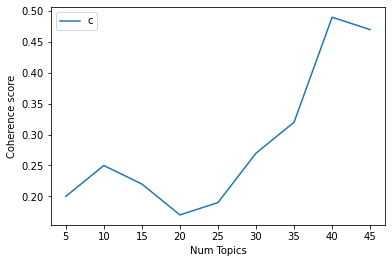

In [193]:
# Show coherence graph
x = df_results['Topics']
y = df_results['Coherence']
plt.plot(x, y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [197]:
topic_analysis = []


In [211]:
get_document_topics = [lda_model_tfidf.get_document_topics(i) for i in corpus]
get_document_topics

[[(0, 0.010690268),
  (1, 0.010690268),
  (2, 0.010690268),
  (3, 0.010690268),
  (4, 0.010690268),
  (5, 0.010690268),
  (6, 0.010690268),
  (7, 0.010690268),
  (8, 0.010690268),
  (9, 0.010690268),
  (10, 0.3185181),
  (11, 0.010690268),
  (12, 0.16517192),
  (13, 0.010690268),
  (14, 0.010690268),
  (15, 0.010690268),
  (16, 0.010690268),
  (17, 0.010690268),
  (18, 0.010690268),
  (19, 0.010690268),
  (20, 0.010690268),
  (21, 0.010690268),
  (22, 0.010690268),
  (23, 0.010690268),
  (24, 0.010690268),
  (25, 0.010690268),
  (26, 0.010690268),
  (27, 0.010690268),
  (28, 0.010690268),
  (29, 0.010690268),
  (30, 0.12077007),
  (31, 0.010690268),
  (32, 0.010690268),
  (33, 0.010690268),
  (34, 0.010690268),
  (35, 0.010690268),
  (36, 0.010690268),
  (37, 0.010690268),
  (38, 0.010690268),
  (39, 0.010690268)],
 [(18, 0.08737291), (26, 0.34829658), (30, 0.0789123), (37, 0.21443151)],
 [(0, 0.0100812735),
  (1, 0.0100812735),
  (2, 0.0100812735),
  (3, 0.0100812735),
  (4, 0.0100812

In [213]:
df['topic_distribution'] = get_document_topics
df.head()

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,...,callouts,hashtag1,is_retweet,clean_tweet,normalized_tweet,tokenized_tweet,bigrams,ngram,tweet&hashtag,topic_distribution
0,0,1292082364328312834,jenny strasburg,jennystrasburg,10,RT @pwonacott: Behind the Beirut Explosion: Se...,2020-08-09 14:02:19.120328,2020-08-08 12:56:56.000000,0,[],...,"[@pwonacott, @DionNissenbaum, @NazihOs]",[],True,RT : Behind the Beirut Explosion: Seven Years ...,[behind beirut explosion seven year official n...,"[behind, beirut, explosion, seven, year, offic...","[behind, beirut_explosion, seven_year, officia...","[behind, beirut_explosion, seven_year, officia...","[behind, beirut_explosion, seven_year, officia...","[(0, 0.010690268), (1, 0.010690268), (2, 0.010..."
1,1,1291840899081801734,jenny strasburg,jennystrasburg,4975,RT @WSJ: The Bill &amp; Melinda Gates Foundati...,2020-08-09 14:02:19.120359,2020-08-07 20:57:26.000000,0,[],...,[@WSJ],[],True,RT : The Bill &amp; Melinda Gates Foundation s...,[bill amp melinda gate foundation say back wor...,"[bill, amp, melinda, gate, foundation, say, ba...","[bill, amp, melinda, gate_foundation, say, bac...","[bill, amp, melinda, gate_foundation, say, bac...","[bill, amp, melinda, gate_foundation, say, bac...","[(18, 0.08737291), (26, 0.34829658), (30, 0.07..."
2,2,1291813767072944131,jenny strasburg,jennystrasburg,0,"In a public report, senior counterintelligence...",2020-08-09 14:02:19.120367,2020-08-07 19:09:37.000000,0,[],...,[@dnvolz],[],False,"In a public report, senior counterintelligence...",[public report senior counterintelligence offi...,"[public, report, senior, counterintelligence, ...","[public_report, senior, counterintelligence_of...","[public_report, senior, counterintelligence_of...","[public_report, senior, counterintelligence_of...","[(0, 0.0100812735), (1, 0.0100812735), (2, 0.0..."
3,3,1291658446304153600,jenny strasburg,jennystrasburg,1,"RT @margheritamvs: A heartbreaking tale, beaut...",2020-08-09 14:02:19.120374,2020-08-07 08:52:26.000000,0,[],...,"[@margheritamvs, @Abihabib]",[],True,"RT : A heartbreaking tale, beautifully told by",[heartbreaking tale beautifully tell],"[heartbreaking, tale, beautifully, tell]","[heartbreaking, tale, beautifully_tell]","[heartbreaking, tale, beautifully_tell]","[heartbreaking, tale, beautifully_tell]","[(0, 0.012214026), (1, 0.012214026), (2, 0.012..."
4,4,1291553272684261377,jenny strasburg,jennystrasburg,472,RT @Kate_OKeeffe: The Trump administration jus...,2020-08-09 14:02:19.120381,2020-08-07 01:54:30.000000,0,[],...,[@Kate_OKeeffe],[],True,RT : The Trump administration just recommended...,[trump administration recommend plan would for...,"[trump, administration, recommend, plan, would...","[trump_administration, recommend, plan, would_...","[trump_administration, recommend, plan, would_...","[trump_administration, recommend, plan, would_...","[(0, 0.0104564), (1, 0.0104564), (2, 0.0104564..."


# Pooling tweets 

In [ ]:
#Lets look at how many tweets per journalist

number_per_user = df.groupby('username').count()
number_per_user

In [ ]:
#turning clean_tweets into a corpus

user_corpus_tweet = df.groupby('username')['clean_tweet'].apply(lambda x: ' '.join([str(i) for i in x]))
user_corpus_tweet

df_user_corpus = pd.DataFrame(user_corpus_tweet)

# Visualisation 

In [59]:
!pip install pyldavis==2.1.2

In [172]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

corpus = corpus_tfidf

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, id_map)
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.133015 -0.004437       1        1  6.527387
25     0.002948  0.112943       2        1  4.692581
22    -0.013664  0.007391       3        1  3.758170
15     0.007187 -0.011216       4        1  3.431063
7      0.007716  0.002131       5        1  3.377610
9     -0.002337 -0.014795       6        1  2.966675
31     0.006056 -0.005036       7        1  2.855445
38     0.000776 -0.005332       8        1  2.645868
32     0.002906 -0.002808       9        1  2.629493
39    -0.001555 -0.010073      10        1  2.578728
16     0.002105  0.001856      11        1  2.568490
4     -0.007667 -0.005799      12        1  2.496051
40    -0.005067 -0.001373      13        1  2.485329
3     -0.007323 -0.002064      14        1  2.460550
24     0.004747  0.000853      15        1  2.412236
19    -0.002693 -0.003579      16        1  2.367609
36    -0.003453 -0.006002      17        1  2.344576
42    -0.004838 -0.004421      18        1  2.319610
23    -0.001809  0.001631      19        1  2.278407
10    -0.009832 -0.006110      20        1  2.266794
29    -0.007894 -0.005403      21        1  2.088823
13    -0.004753 -0.000881      22        1  1.999370
20    -0.005818 -0.001170      23        1  1.914675
17    -0.001709  0.000843      24        1  1.907648
43    -0.004255 -0.003137      25        1  1.877638
12    -0.008714 -0.001759      26        1  1.823981
1     -0.004557 -0.003554      27        1  1.797272
26    -0.006578 -0.003161      28        1  1.748627
34    -0.003530 -0.003259      29        1  1.686074
28    -0.001690 -0.000326      30        1  1.679226
37    -0.006832 -0.000888      31        1  1.594203
11    -0.003759 -0.001998      32        1  1.583205
30    -0.003310 -0.002810      33        1  1.575984
5     -0.006025 -0.004456      34        1  1.532701
6     -0.005961 -0.002623      35        1  1.525478
27    -0.005847 -0.000295      36        1  1.507363
0     -0.000115  0.003669      37        1  1.501577
8     -0.002232 -0.002154      38        1  1.499241
41    -0.004101 -0.001374      39        1  1.478756
44    -0.000766 -0.002303      40        1  1.454744
14    -0.003823 -0.001646      41        1  1.440434
33    -0.006444 -0.001798      42        1  1.411836
35     0.001219 -0.002035      43        1  1.352990
2     -0.005449 -0.001862      44        1  1.328225
21    -0.004275  0.000622      45        1  1.227262, topic_info=             Term        Freq       Total Category  logprob  loglift
190         thank  115.000000  115.000000  Default  30.0000  30.0000
2829          yes   35.000000   35.000000  Default  29.0000  29.0000
4216         love   35.000000   35.000000  Default  28.0000  28.0000
1257         good   42.000000   42.000000  Default  27.0000  27.0000
239          help   38.000000   38.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1979          etc    1.118680    9.258440  Topic45  -6.6980   2.2870
17269      celebs    0.471215    2.485005  Topic45  -7.5626   2.7377
865            go    0.736125   57.279209  Topic45  -7.1165   0.0461
5381   remarkable    0.447593    3.151790  Topic45  -7.6140   2.4485
406          mean    0.451786   15.777120  Topic45  -7.6047   0.8473

[2008 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
20987     44  0.505765  AspenSecurity
39966      7  0.659441           BHEU
8159      37  0.499019       Barclays
16515      8  0.350315    Coronavirus
25512     17  0.389352  CyberSecurity
...      ...       ...            ...
4939       7  0.634820           zone
3637       6  0.206758           zoom
3637      15  0.516895           zoom
3637      27  0.103379           zoom
17012     20  0.366374           zuck

[3714 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1